In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [6]:
df_credit = pd.read_csv('/content/credit_record.csv')
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
715541,5096541,-38,0
715542,5096541,-39,0
715543,5096541,-40,0
715544,5096541,-41,0


In [7]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715546 entries, 0 to 715545
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              715546 non-null  int64 
 1   MONTHS_BALANCE  715546 non-null  int64 
 2   STATUS          715545 non-null  object
dtypes: int64(2), object(1)
memory usage: 16.4+ MB


In [8]:
df_credit['ID'].duplicated().sum()

684316

In [10]:
df_application = pd.read_csv('/content/application_record.csv')
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135507,5632103,F,N,Y,0,139500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-23153,365243.0,1.0,0.0,1.0,0.0,NaN,2.0
135508,5632104,F,N,Y,0,139500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-23153,365243.0,1.0,0.0,1.0,0.0,NaN,2.0
135509,5632105,F,N,Y,0,139500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-23153,365243.0,1.0,0.0,1.0,0.0,NaN,2.0
135510,5632106,F,N,Y,0,139500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-23153,365243.0,1.0,0.0,1.0,0.0,NaN,2.0


In [11]:
df_application['ID'].duplicated().sum()

0

In [12]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135512 entries, 0 to 135511
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   135512 non-null  int64  
 1   CODE_GENDER          135512 non-null  object 
 2   FLAG_OWN_CAR         135512 non-null  object 
 3   FLAG_OWN_REALTY      135512 non-null  object 
 4   CNT_CHILDREN         135512 non-null  int64  
 5   AMT_INCOME_TOTAL     135512 non-null  float64
 6   NAME_INCOME_TYPE     135512 non-null  object 
 7   NAME_EDUCATION_TYPE  135512 non-null  object 
 8   NAME_FAMILY_STATUS   135512 non-null  object 
 9   NAME_HOUSING_TYPE    135512 non-null  object 
 10  DAYS_BIRTH           135512 non-null  int64  
 11  DAYS_EMPLOYED        135511 non-null  float64
 12  FLAG_MOBIL           135511 non-null  float64
 13  FLAG_WORK_PHONE      135511 non-null  float64
 14  FLAG_PHONE           135511 non-null  float64
 15  FLAG_EMAIL       

In [13]:
df_application.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [15]:
mode_status = df_credit.groupby('ID')['STATUS'].agg(lambda x: x.mode()[0]).reset_index()
mode_status.rename(columns={'STATUS': 'mode_status'}, inplace=True)
mode_status = mode_status[mode_status['mode_status'] != 'X']

merged_df = pd.merge(df_application, mode_status, on='ID', how='inner')

In [16]:
mode_status.head()

,ID,mode_status
0,5001711,0
1,5001712,0
5,5001717,0
6,5001718,0
7,5001719,C


In [17]:
print(mode_status['mode_status'].unique())

['0' 'C' '1' '5' '2']


In [18]:
def label_status(status):
    if status in {"0", "1", "2", "3", "4", "5"}:
        return 'bad'
    elif status == 'C':
        return 'good'
    else:
        return 'unknown'

In [19]:
merged_df['mode_status'].value_counts()

,count
mode_status,
0,11501
C,8045
1,42
5,7


In [20]:
merged_df['label'] = merged_df['mode_status'].apply(label_status)

merged_df['label'].value_counts()

,count
label,
bad,11550
good,8045


In [21]:
merged_df['TARGET'] = merged_df['label'].apply(lambda x: 0 if x == 'bad' else 1)

merged_df['TARGET'].value_counts()

,count
TARGET,
0,11550
1,8045


In [22]:
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,mode_status,label,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,C,good,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,C,good,1
2,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,C,good,1
3,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,C,good,1
4,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,365243.0,1.0,0.0,0.0,0.0,NaN,1.0,0,bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590,5096531,F,Y,N,0,216000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-4327.0,1.0,1.0,0.0,0.0,Medicine staff,2.0,C,good,1
19591,5096532,F,Y,N,0,216000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-4327.0,1.0,1.0,0.0,0.0,Medicine staff,2.0,C,good,1
19592,5096537,F,Y,N,0,216000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-4327.0,1.0,1.0,0.0,0.0,Medicine staff,2.0,C,good,1
19593,5096538,F,Y,N,0,216000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-4327.0,1.0,1.0,0.0,0.0,Medicine staff,2.0,0,bad,0


In [23]:
merged_df.drop(columns=['mode_status', 'label'], inplace=True)

In [24]:
merged_df['ID'].duplicated().sum()

0

In [25]:
merged_df.shape

(19595, 19)

In [26]:
merged_df.fillna({'OCCUPATION_TYPE': 'Unknown'}, inplace=True)

In [27]:
occupation_types = merged_df['OCCUPATION_TYPE'].unique()
print(occupation_types)

['Unknown' 'Sales staff' 'Accountants' 'Laborers' 'Managers' 'Drivers'
 'Core staff' 'Security staff' 'High skill tech staff' 'Cleaning staff'
 'Cooking staff' 'Low-skill Laborers' 'Medicine staff'
 'Private service staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'IT staff' 'Realty agents']


In [28]:
merged_df['AGE'] = merged_df['DAYS_BIRTH'].apply(lambda x: abs(x) // 365)

# Calculate credit history length
credit_history_length = df_credit.groupby('ID')['MONTHS_BALANCE'].apply(lambda x: x.max() - x.min()).reset_index()
credit_history_length.columns = ['ID', 'CREDIT_HISTORY_LENGTH']
merged_df = pd.merge(merged_df, credit_history_length, on='ID', how='left')

# Determine if there's recent activity within the last 6 months
def recent_activity(months_balance):
    return 1 if any(month >= -6 for month in months_balance) else 0

recent_activity_flag = df_credit.groupby('ID')['MONTHS_BALANCE'].apply(recent_activity).reset_index()
recent_activity_flag.columns = ['ID', 'RECENT_ACTIVITY']
merged_df = pd.merge(merged_df, recent_activity_flag, on='ID', how='left')

# Calculate years employed and unemployment status
merged_df['YEARS_EMPLOYED'] = merged_df['DAYS_EMPLOYED'].apply(lambda x: abs(x) // 365)
merged_df['IS_UNEMPLOYED'] = merged_df['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 0 else 0)

In [29]:
le = LabelEncoder()
merged_df['CODE_GENDER'] = le.fit_transform(merged_df['CODE_GENDER'])
merged_df['FLAG_OWN_CAR'] = le.fit_transform(merged_df['FLAG_OWN_CAR'])
merged_df['FLAG_OWN_REALTY'] = le.fit_transform(merged_df['FLAG_OWN_REALTY'])

# Convert categorical features to dummy/indicator variables
merged_df = pd.get_dummies(merged_df,
                           columns=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],
                           drop_first=True)

# Identify the boolean columns and cast them to integers
bool_columns = merged_df.select_dtypes(include=['bool']).columns
merged_df[bool_columns] = merged_df[bool_columns].astype(int)

In [30]:
merged_df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19595 entries, 0 to 19594
Data columns (total 52 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 19595 non-null  int64  
 1   CODE_GENDER                                        19595 non-null  int64  
 2   FLAG_OWN_CAR                                       19595 non-null  int64  
 3   FLAG_OWN_REALTY                                    19595 non-null  int64  
 4   CNT_CHILDREN                                       19595 non-null  int64  
 5   AMT_INCOME_TOTAL                                   19595 non-null  float64
 6   FLAG_MOBIL                                         19595 non-null  float64
 7   FLAG_WORK_PHONE                                    19595 non-null  float64
 8   FLAG_PHONE                                         19595 non-null  float64
 9   FLAG_E

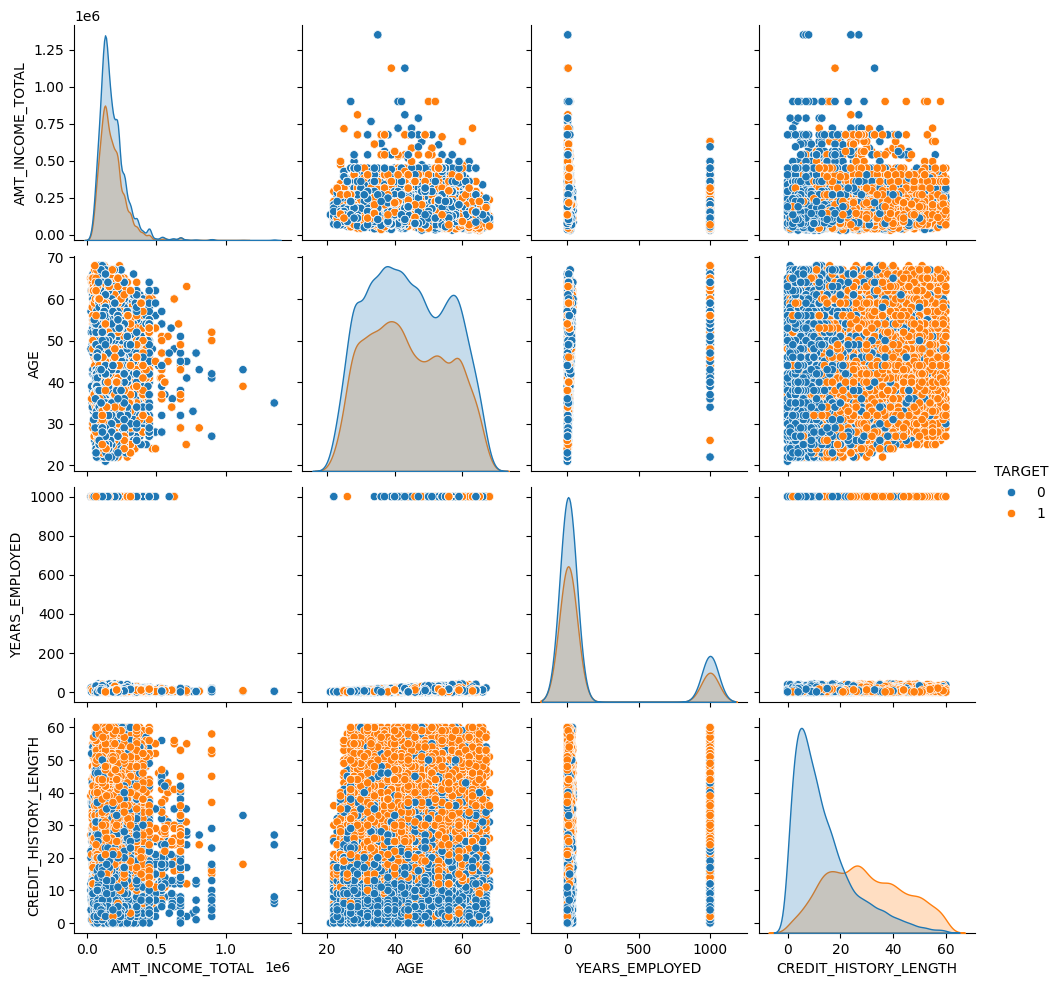

In [32]:
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Pair Plot for numerical features
sns.pairplot(merged_df[['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'CREDIT_HISTORY_LENGTH', 'TARGET']],
             hue='TARGET')
plt.show()

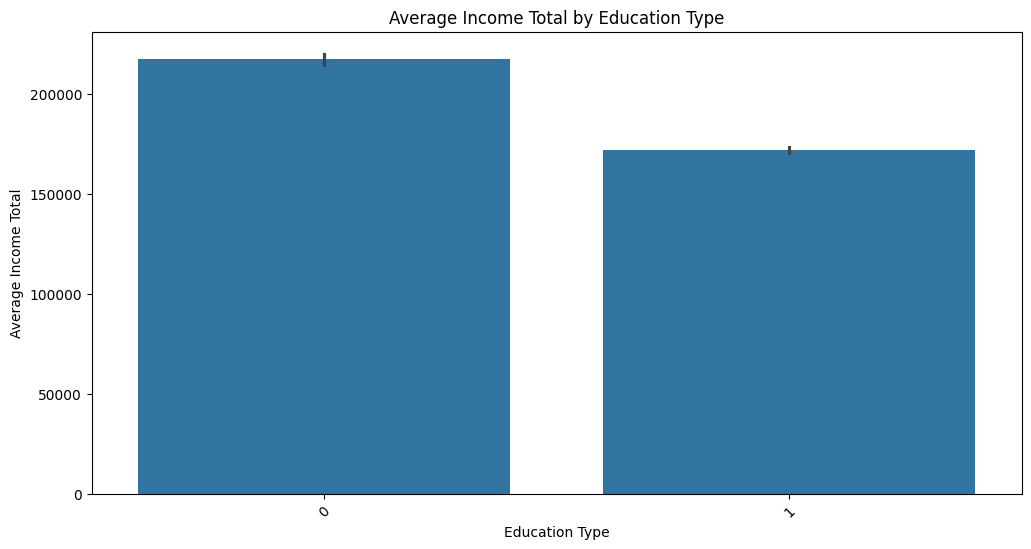

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME_EDUCATION_TYPE_Secondary / secondary special', y='AMT_INCOME_TOTAL', data=merged_df)
plt.title('Average Income Total by Education Type')
plt.xlabel('Education Type')
plt.ylabel('Average Income Total')
plt.xticks(rotation=45)
plt.show()

In [34]:
X = merged_df.drop(columns=['ID', 'TARGET'])
y = merged_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
print("Logistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Logistic Regression Results:
Confusion Matrix:
 [[2967  517]
 [ 985 1410]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80      3484
           1       0.73      0.59      0.65      2395

    accuracy                           0.74      5879
   macro avg       0.74      0.72      0.73      5879
weighted avg       0.74      0.74      0.74      5879

Accuracy Score: 0.7445143731927198
ROC AUC Score: 0.7201669307229709


In [37]:
rf = RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("Random Forest Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Random Forest Results:
Confusion Matrix:
 [[2937  547]
 [ 684 1711]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      3484
           1       0.76      0.71      0.74      2395

    accuracy                           0.79      5879
   macro avg       0.78      0.78      0.78      5879
weighted avg       0.79      0.79      0.79      5879

Accuracy Score: 0.7906106480693995
ROC AUC Score: 0.7787007830607681


In [39]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

XGBoost Results:
Confusion Matrix:
 [[2866  618]
 [ 713 1682]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      3484
           1       0.73      0.70      0.72      2395

    accuracy                           0.77      5879
   macro avg       0.77      0.76      0.76      5879
weighted avg       0.77      0.77      0.77      5879

Accuracy Score: 0.7736009525429495
ROC AUC Score: 0.7624570658830467


In [40]:
X = merged_df.drop(columns=['TARGET', 'ID'])
y = merged_df['TARGET']

# Splitting the dataset into training and testing sets (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the distribution of the target after applying SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: TARGET
0    9240
1    6436
Name: count, dtype: int64
After SMOTE: TARGET
0    9240
1    9240
Name: count, dtype: int64


In [41]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_clf.predict(X_test)

# Evaluating Random Forest
print("Evaluating Random Forest:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rf):.4f}")

Evaluating Random Forest:
Confusion Matrix:
[[1859  451]
 [ 394 1215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2310
           1       0.73      0.76      0.74      1609

    accuracy                           0.78      3919
   macro avg       0.78      0.78      0.78      3919
weighted avg       0.79      0.78      0.78      3919

Accuracy Score: 0.7844
ROC AUC Score: 0.7799


In [42]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluating XGBoost
print("Evaluating XGBoost:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_xgb):.4f}")

Evaluating XGBoost:
Confusion Matrix:
[[1806  504]
 [ 410 1199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2310
           1       0.70      0.75      0.72      1609

    accuracy                           0.77      3919
   macro avg       0.76      0.76      0.76      3919
weighted avg       0.77      0.77      0.77      3919

Accuracy Score: 0.7668
ROC AUC Score: 0.7635
